In [76]:
# This notebook will contain the following steps:
# 1. Dataset Loading
# 2. Pre-processing the Dataset
# 3. Running a Model over the Lifted Dataset

from modules.data.load.loaders import GraphLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)


Dataset configuration for MUTAG:

{'data_domain': 'graph',
 'data_type': 'TUDataset',
 'data_name': 'MUTAG',
 'data_dir': 'datasets/graph/TUDataset',
 'num_features': [7, 4],
 'num_classes': 2,
 'task': 'classification',
 'loss_type': 'cross_entropy',
 'monitor_metric': 'accuracy',
 'task_level': 'graph',
 'max_dim_if_lifted': 2,
 'preserve_edge_attr_if_lifted': False}

Dataset contains 188 samples.

Providing more details about sample 0/188:


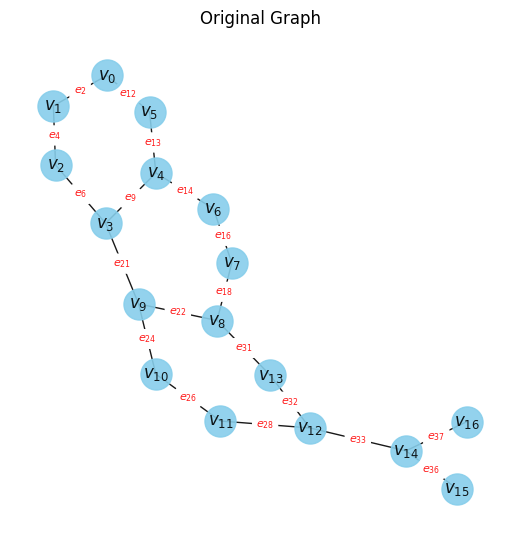

 - Graph with 17 vertices and 38 edges.
 - Features dimensions: [7, 4]
 - There are 0 isolated nodes.



In [84]:
dataset_name = "MUTAG"
dataset_config = load_dataset_config(dataset_name)
loader = GraphLoader(dataset_config)
dataset = loader.load()
describe_data(dataset)

In [78]:
# Step 2: Pre-processing the Dataset
# Define transformation type and id
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "graph2hypergraph/attribute_lifting"
# lifting = NodeAttributeLifting(attribute_idx=0)
# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for graph2hypergraph/attribute_lifting:

{'transform_type': 'lifting',
 'transform_name': 'HypergraphNodeAttributeLifting',
 'attribute_idx': 1,
 'feature_lifting': 'ProjectionSum'}


In [83]:
# apply transform via Preproceser
lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
# describe_data(lifted_dataset)

Transform parameters are the same, using existing data_dir: /Users/demi/challenge-icml-2024/datasets/graph/TUDataset/MUTAG/lifting/3035693673


In [80]:
# Step 3: Running a Model over the Lifted Dataset
# This will use TopoModelX as per the example.
from modules.models.hypergraph.unigcn import UniGCNModel

model_type = "hypergraph"
model_id = "unigcn"
model_config = load_model_config(model_type, model_id)

model = UniGCNModel(model_config, dataset_config)


Model configuration for hypergraph UNIGCN:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2}


In [81]:
y_hat = model(lifted_dataset.get(0))